# Verification tests on DC2 metacal catalog
Owner: Francois Lanusse 
Last Run: May 31st, 2019

This notebook intends to demonstrates the data access to a metacal catalog produced with the stack, through the GCR, as well running some basic checks.

In [1]:
%pylab inline

# Temporary fix while GCRCatalogs is updated
import sys
sys.path.insert(0, '/global/homes/f/flanusse/repo/gcr-catalogs/') # You need the master branch of gcr-catalogs: https://github.com/LSSTDESC/gcr-catalogs
import GCRCatalogs
from GCR import GCRQuery

Populating the interactive namespace from numpy and matplotlib


/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/register.py:23: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


In [2]:
catalog = GCRCatalogs.load_catalog('dc2_object_run1.2i_tract5063_with_metacal.yaml');

/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_dm_catalog.py:221: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(schema_stream)
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_dm_catalog.py:150: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  base_dict = yaml.load(ofile)
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_object.py:506: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(schema_stream)
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_object.py:420: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Ple

## Comparing measured sizes

In [137]:
# Let's select some sample by applying the recommended metacal cuts
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts, although I guess to be rigorous we shouldn't apply the clean flag here
mask &= catalog['mcal_s2n'] > 10
# Let's restrict to objects with hsm shapes measured in the i band
mask &= catalog['merge_measurement_i']

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater_equal
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater


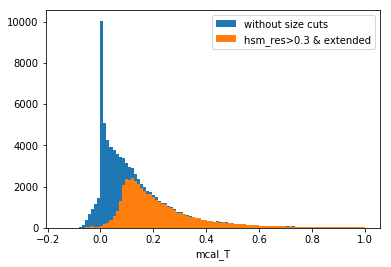

In [138]:
# Let's plot the mcal size distribution and see how it changes for resolved objects 
hist(catalog['mcal_T'][mask],100,range=[-0.15,1], label='without size cuts');
# Let's see what happens for objects detected as well resolved by the stack
mask_resolved = mask & (catalog['ext_shapeHSM_HsmShapeRegauss_resolution'] >= 0.3)
mask_resolved &= catalog['extendedness'] > 0
hist(catalog['mcal_T'][mask_resolved],100,range=[-0.15,1], label='hsm_res>0.3 & extended');
xlabel('mcal_T')
legend();

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


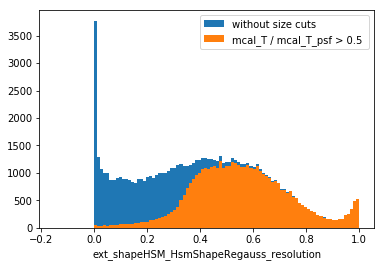

In [159]:
#  On the opposite, let's see what the mcal size cuts looks like in terms of resolution
hist(catalog['ext_shapeHSM_HsmShapeRegauss_resolution'][mask],100,range=[-0.15,1], label='without size cuts');
mask_resolved = mask & (catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5)
hist(catalog['ext_shapeHSM_HsmShapeRegauss_resolution'][mask_resolved],100,range=[-0.15,1], label='mcal_T / mcal_T_psf > 0.5 ');
xlabel('ext_shapeHSM_HsmShapeRegauss_resolution')
legend();

About 3.12 percent of objects seem borderline resolved


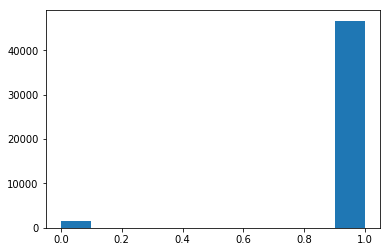

In [160]:
# Let's look at how many of these objects the stack thinks are not extended
hist(catalog['extendedness'][mask_resolved]);
print('About %0.02f percent of objects seem borderline resolved'%(100.*sum(catalog['extendedness'][mask_resolved] == 0) /len(catalog['extendedness'][mask_resolved])))

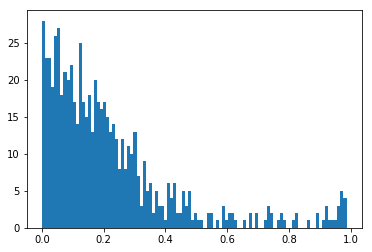

In [162]:
# Looking at size distribution of objects that appear resolved to metacal, and not to the stack
hist(catalog['ext_shapeHSM_HsmShapeRegauss_resolution'][mask_resolved & (catalog['extendedness'] == 0)],100);

## Comparing fluxes and magnitudes

In [3]:
# Let's select a sample of resolved objects according to metacal
# To avoid possible confusions, we select only objects using the i-band as reference
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts, although I guess to be rigorous we shouldn't apply the clean flag here
mask &= catalog['mcal_s2n'] > 10
mask &= catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5
mask &= catalog['mcal_mag_i'] < 24.5
mask &= catalog['merge_measurement_i']

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_metacal.py:93: RuntimeWarning: invalid value encountered in log10
  lambda x: -2.5 * np.log10(x * self._flux_scaling) + self.METACAL_ZEROPOINT,
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less


/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


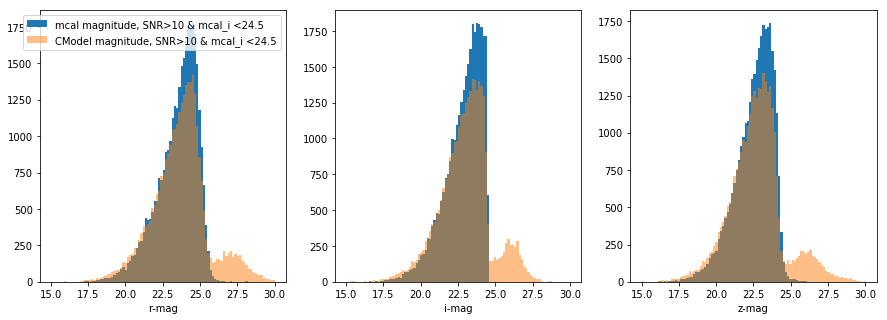

In [4]:
figure(figsize=(15,5))
subplot(131)
hist(catalog['mcal_mag_r'][mask],100,range=[15,30], label='mcal magnitude, SNR>10 & mcal_i <24.5');
hist(catalog['mag_r_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10 & mcal_i <24.5', alpha=0.5);
legend()
xlabel('r-mag')

subplot(132)
hist(catalog['mcal_mag_i'][mask],100,range=[15,30], label='mcal magnitude, SNR>10');
hist(catalog['mag_i_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10', alpha=0.5);

xlabel('i-mag')

subplot(133)
hist(catalog['mcal_mag_z'][mask],100,range=[15,30], label='mcal magnitude, SNR>10');
hist(catalog['mag_z_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10', alpha=0.5);

xlabel('z-mag');

We see that for some objects seen as very faint by the stack (below 26 mag), metacal actually thinks they are brighter than 24.5 mag....  

Let's have a look at the size / mag distribution of these offending objects:

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


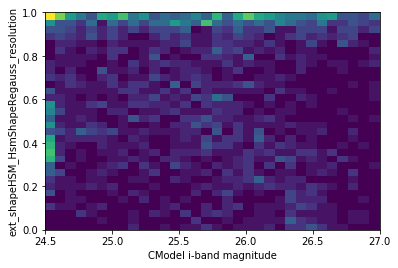

In [6]:
mask = mask & (catalog['mag_i_cModel'] > 24.5)
hist2d(catalog['mag_i_cModel'][mask], catalog['ext_shapeHSM_HsmShapeRegauss_resolution'][mask], 32,range=[[24.5,27], [0,1]]);
xlabel('CModel i-band magnitude');
ylabel('ext_shapeHSM_HsmShapeRegauss_resolution');

This looks suspicious, having perfectly resolved objects at these magnitude... probably some blending problems somewhere, let's add blendedness to this plot:

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


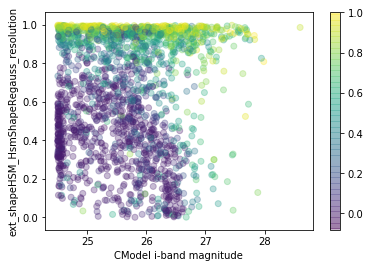

In [12]:
mask = mask & (catalog['mag_i_cModel'] > 24.5)
scatter(catalog['mag_i_cModel'][mask], 
        catalog['ext_shapeHSM_HsmShapeRegauss_resolution'][mask], 
        c=catalog['blendedness'][mask], alpha=0.3);
xlabel('CModel i-band magnitude');
ylabel('ext_shapeHSM_HsmShapeRegauss_resolution');
colorbar()

So obviously we have some highly blended garbage here, let's get rid of that with a cut at blendedness < 0.1

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


Text(0.5, 0, 'log10(blendedness)')

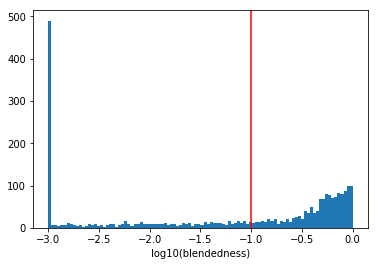

In [23]:
hist(log10(abs(catalog['blendedness'][mask & (catalog['mag_i_cModel'] > 24.5)]) +0.001),100);
axvline(-1,color='r')
xlabel('log10(blendedness)')

In [34]:
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts, although I guess to be rigorous we shouldn't apply the clean flag here
mask &= catalog['mcal_s2n'] > 10
mask &= catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5
mask &= catalog['mcal_mag_i'] < 24.5
mask &= catalog['merge_measurement_i']
mask &= abs(catalog['blendedness']) < 0.01

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less


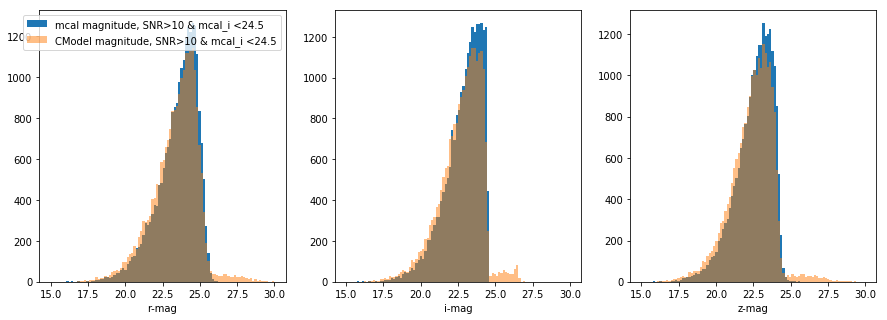

In [35]:
figure(figsize=(15,5))
subplot(131)
hist(catalog['mcal_mag_r'][mask],100,range=[15,30], label='mcal magnitude, SNR>10 & mcal_i <24.5');
hist(catalog['mag_r_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10 & mcal_i <24.5', alpha=0.5);
legend()
xlabel('r-mag')

subplot(132)
hist(catalog['mcal_mag_i'][mask],100,range=[15,30], label='mcal magnitude, SNR>10');
hist(catalog['mag_i_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10', alpha=0.5);

xlabel('i-mag')

subplot(133)
hist(catalog['mcal_mag_z'][mask],100,range=[15,30], label='mcal magnitude, SNR>10');
hist(catalog['mag_z_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10', alpha=0.5);

xlabel('z-mag');

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less


Text(0.5, 1.0, 'With Blendedness Cut')

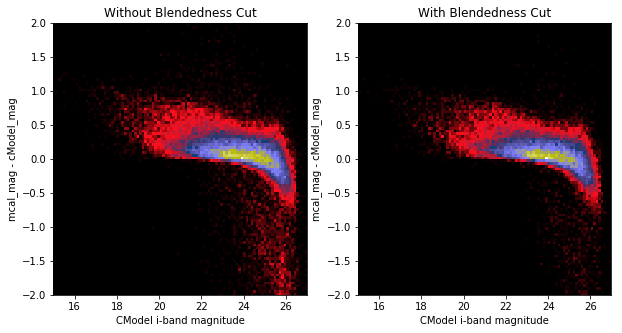

In [42]:
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts, although I guess to be rigorous we shouldn't apply the clean flag here
mask &= catalog['mcal_s2n'] > 10
mask &= catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5
mask &= catalog['merge_measurement_i']

figure(figsize=(10,5))
subplot(121)

hist2d(catalog['mag_i_cModel'][mask], catalog['mcal_mag_i'][mask]  -  catalog['mag_i_cModel'][mask], 100,range=[[15,27], [-2,2]], cmap='gist_stern');
xlabel('CModel i-band magnitude');

title('Without Blendedness Cut')
ylabel('mcal_mag - cModel_mag');
subplot(122)

hist2d(catalog['mag_i_cModel'][mask & (abs(catalog['blendedness']) < 0.01)], catalog['mcal_mag_i'][mask& (abs(catalog['blendedness']) < 0.01)]  -  catalog['mag_i_cModel'][mask& (abs(catalog['blendedness']) < 0.01)], 100,range=[[15,27], [-2,2]], cmap='gist_stern');
xlabel('CModel i-band magnitude');
ylabel('mcal_mag - cModel_mag');
title('With Blendedness Cut')

In [56]:
# Code borrowed from MWV's tutorial notebook on postage stamps
import os
import numpy as np

from astropy.table import Table

import lsst.daf.persistence as dafPersist
import lsst.afw.geom as afwGeom
import lsst.afw.coord as afwCoord
import lsst.afw.image as afwImage
import lsst.afw.display as afwDisplay

from astropy.visualization import ZScaleInterval

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 6)
zscale = ZScaleInterval()


def cutout_coadd_ra_dec(butler, ra, dec, filter='r', datasetType='deepCoadd', **kwargs):
    """
    Produce a cutout from coadd from the given butler at the given RA, Dec in decimal degrees.
    
    Notes
    -----
    Trivial wrapper around 'cutout_coadd_spherepoint'
    
    Parameters
    ----------
    butler: lsst.daf.persistence.Butler
        Servant providing access to a data repository
    ra: float
        Right ascension of the center of the cutout, degrees
    dec: float
        Declination of the center of the cutout, degrees
    filter: string
        Filter of the image to load
        
    Returns
    -------
    MaskedImage
    """
    radec = afwGeom.SpherePoint(ra, dec, afwGeom.degrees)
    return cutout_coadd_spherepoint(butler, radec, filter=filter, datasetType=datasetType)
    

def cutout_coadd_spherepoint(butler, radec, filter='r', datasetType='deepCoadd',
                                  skymap=None, cutoutSideLength=51, **kwargs):
    """
    Produce a cutout from a coadd at the given afw SpherePoint radec position.
    
    Parameters
    ----------
    butler: lsst.daf.persistence.Butler
        Servant providing access to a data repository
    radec: lsst.afw.geom.SpherePoint 
        Coordinates of the center of the cutout.
    filter: string 
        Filter of the image to load
    datasetType: string ['deepCoadd']  
        Which type of coadd to load.  Doesn't support 'calexp'
    skymap: lsst.afw.skyMap.SkyMap [optional] 
        Pass in to avoid the Butler read.  Useful if you have lots of them.
    cutoutSideLength: float [optional] 
        Side of the cutout region in pixels.
    
    Returns
    -------
    MaskedImage
    """
    cutoutSize = afwGeom.ExtentI(cutoutSideLength, cutoutSideLength)

    if skymap is None:
        skymap = butler.get("%s_skyMap" % datasetType)
    
    # Look up the tract, patch for the RA, Dec
    tractInfo = skymap.findTract(radec)
    patchInfo = tractInfo.findPatch(radec)
    xy = afwGeom.PointI(tractInfo.getWcs().skyToPixel(radec))
    bbox = afwGeom.BoxI(xy - cutoutSize//2, cutoutSize)

    coaddId = {'tract': tractInfo.getId(), 'patch': "%d,%d" % patchInfo.getIndex(), 'filter': filter}
    
    cutout_image = butler.get(datasetType+'_sub', bbox=bbox, immediate=True, dataId=coaddId)
    
    return cutout_image

def make_cutout_image(butler, ra, dec, filter='r', vmin=None, vmax=None, label=None,
                      show=True, saveplot=False, savefits=False,
                      datasetType='deepCoadd'):
    """
    Generate and optionally display and save a postage stamp for a given RA, Dec.
    
    Parameters
    ----------
    butler: lsst.daf.persistence.Butler
        Servant providing access to a data repository
    ra: float
        Right ascension of the center of the cutout, degrees
    dec: float
        Declination of the center of the cutout, degrees
    filter: string 
        Filter of the image to load
    Returns
    -------
    MaskedImage

    Notes
    -----
    Uses matplotlib to generate stamps.  Saves FITS file if requested.
    """

    cutout_image = cutout_coadd_ra_dec(butler, ra, dec, filter=filter, datasetType='deepCoadd')
    if savefits:
        if isinstance(savefits, str):
            filename = savefits
        else:
            filename = 'postage-stamp.fits'
        cutout_image.writeFits(filename)
    
    radec = afwGeom.SpherePoint(ra, dec, afwGeom.degrees)
    xy = cutout_image.getWcs().skyToPixel(radec)
    
    if vmin is None or vmax is None:
        vmin, vmax = zscale.get_limits(cutout_image.image.array)

    plt.imshow(cutout_image.image.array, vmin=vmin, vmax=vmax, cmap='binary_r', origin='lower')
    plt.colorbar()
    plt.scatter(xy.getX() - cutout_image.getX0(), xy.getY() - cutout_image.getY0(),
                color='none', edgecolor='red', marker='o', s=200)
    if label is not None:
        plt.title(label)
    if saveplot:
        if isinstance(saveplot, str):
            filename = saveplot
        else:
            filename = 'postage-stamp.png'
        plt.savefig(filename)
    if show:
        plt.show()

    return cutout_image

In [57]:
butler = dafPersist.Butler('/global/projecta/projectdirs/lsst/global/in2p3/Run1.2i/w_2018_39/rerun/metacal-test3')

In [58]:
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts, although I guess to be rigorous we shouldn't apply the clean flag here
mask &= catalog['mcal_s2n'] > 10
mask &= catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5
mask &= catalog['merge_measurement_i']
mask &= catalog['mcal_mag_i'] < 24.5
mask &= catalog['mag_i_cModel'] > 25
mask &= (abs(catalog['blendedness']) < 0.1)

ra = catalog['ra'][mask]
dec = catalog['dec'][mask]

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_metacal.py:93: RuntimeWarning: invalid value encountered in log10
  lambda x: -2.5 * np.log10(x * self._flux_scaling) + self.METACAL_ZEROPOINT,
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1

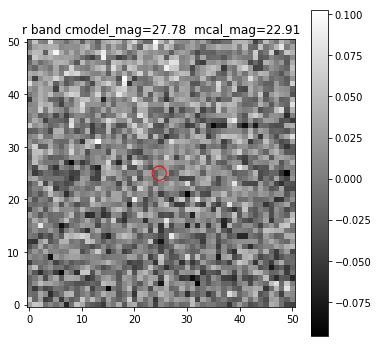

/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_metacal.py:93: RuntimeWarning: invalid value encountered in log10
  lambda x: -2.5 * np.log10(x * self._flux_scaling) + self.METACAL_ZEROPOINT,


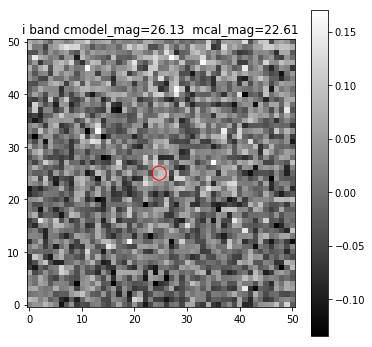

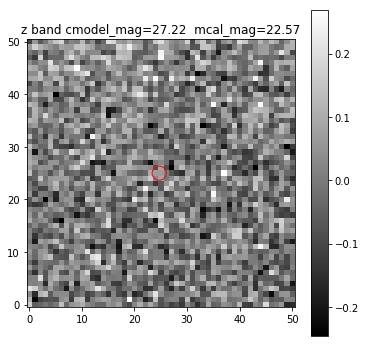

In [59]:
ind=0
cutout = make_cutout_image(butler, ra[ind], dec[ind], filter='r', label=("r band cmodel_mag=%0.2f  mcal_mag=%0.2f"%(catalog['mag_r_cModel'][mask][ind],catalog['mcal_mag_r'][mask][ind] )))
cutout = make_cutout_image(butler, ra[ind], dec[ind], filter='i', label=("i band cmodel_mag=%0.2f  mcal_mag=%0.2f"%(catalog['mag_i_cModel'][mask][ind],catalog['mcal_mag_i'][mask][ind] )))
cutout = make_cutout_image(butler, ra[ind], dec[ind], filter='z', label=("z band cmodel_mag=%0.2f  mcal_mag=%0.2f"%(catalog['mag_z_cModel'][mask][ind],catalog['mcal_mag_z'][mask][ind] )))

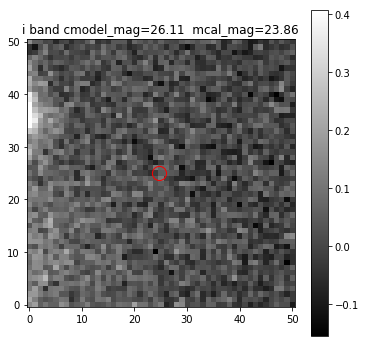

In [60]:
ind = 1
cutout = make_cutout_image(butler, catalog['ra'][mask][ind], catalog['dec'][mask][ind], filter='i', label=("i band cmodel_mag=%0.2f  mcal_mag=%0.2f"%(catalog['mag_i_cModel'][mask][ind],catalog['mcal_mag_i'][mask][ind] )))

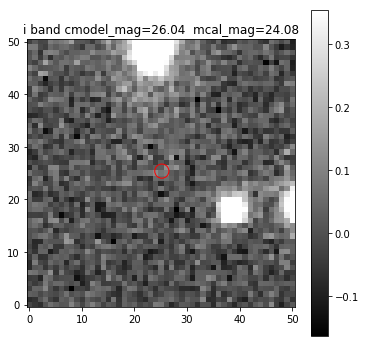

In [61]:
ind = 2
cutout = make_cutout_image(butler, catalog['ra'][mask][ind], catalog['dec'][mask][ind], filter='i', label=("i band cmodel_mag=%0.2f  mcal_mag=%0.2f"%(catalog['mag_i_cModel'][mask][ind],catalog['mcal_mag_i'][mask][ind] )))

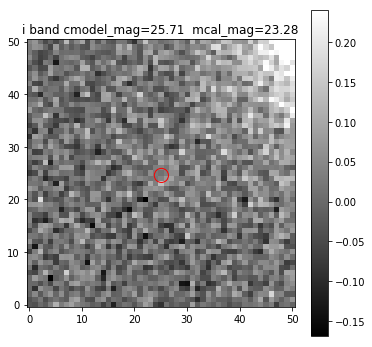

0.09478638915426885


In [63]:
ind = 3
cutout = make_cutout_image(butler, catalog['ra'][mask][ind], catalog['dec'][mask][ind], filter='i', label=("i band cmodel_mag=%0.2f  mcal_mag=%0.2f"%(catalog['mag_i_cModel'][mask][ind],catalog['mcal_mag_i'][mask][ind] )))
print(catalog['blendedness'][mask][ind])

In [65]:
print(catalog['blendedness'][mask][0:10])

[0.         0.02340218 0.04583573 0.09478639 0.04107941 0.05467787
 0.05875412 0.00671376 0.00514204 0.        ]


/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less


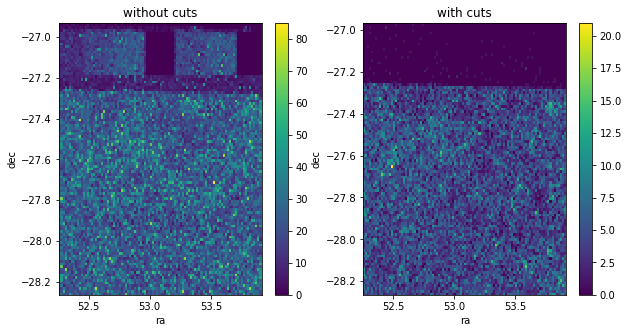

In [49]:
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts, although I guess to be rigorous we shouldn't apply the clean flag here
mask &= catalog['mcal_s2n'] > 10
mask &= catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5
mask &= catalog['merge_measurement_i']
mask &= (abs(catalog['blendedness'])< 0.01)

figure(figsize=(10,5))
subplot(121)
hist2d(catalog['ra'], catalog['dec'],100);
xlabel('ra');
ylabel('dec');
colorbar();

title('without cuts')

subplot(122)
hist2d(catalog['ra'][mask], catalog['dec'][mask],100);
xlabel('ra');
ylabel('dec');
colorbar();
title('with cuts');

## Basic shape tests

In [50]:
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts, although I guess to be rigorous we shouldn't apply the clean flag here
mask &= catalog['mcal_s2n'] > 10
mask &= catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5
mask &= catalog['extendedness'] > 0
mask &= np.isfinite(catalog['mcal_mag_i']) & np.isfinite(catalog['mag_i_cModel'])
mask &= catalog['xy_flag'] == 0
mask &= catalog['ext_shapeHSM_HsmShapeRegauss_resolution'] >= 0.3
mask &= catalog['blendedness'] < 0.1

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_metacal.py:93: RuntimeWarning: invalid value encountered in log10
  lambda x: -2.5 * np.log10(x * self._flux_scaling) + self.METACAL_ZEROPOINT,
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipip

In [51]:
# Convert mcal shear to distortion for comparison with HSM shapes
mcal_g = np.sqrt(catalog['mcal_g1']**2 +  catalog['mcal_g2']**2)
mcal_e1 = - 2 * catalog['mcal_g1'] / (1 + mcal_g**2)
mcal_e2 = - 2 * catalog['mcal_g2'] / (1 + mcal_g**2)

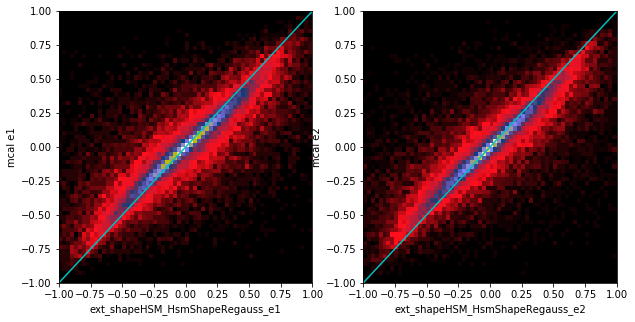

In [52]:
figure(figsize=(10,5))
subplot(121)
hist2d(catalog['ext_shapeHSM_HsmShapeRegauss_e1'][mask], mcal_e1[mask], 
       64, range=[[-1,1],[-1,1]], cmap='gist_stern');
ylabel('mcal e1')
xlabel('ext_shapeHSM_HsmShapeRegauss_e1');
plot([-1,1],[-1,1],color='c')

subplot(122)
hist2d(catalog['ext_shapeHSM_HsmShapeRegauss_e2'][mask], mcal_e2[mask], 
       64, range=[[-1,1],[-1,1]], cmap='gist_stern');
ylabel('mcal e2')
xlabel('ext_shapeHSM_HsmShapeRegauss_e2');
plot([-1,1],[-1,1],color='c')

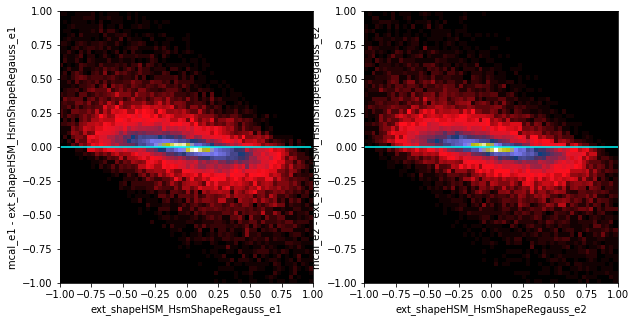

In [53]:
figure(figsize=(10,5))
subplot(121)
hist2d( catalog['ext_shapeHSM_HsmShapeRegauss_e1'][mask],  mcal_e1[mask] - catalog['ext_shapeHSM_HsmShapeRegauss_e1'][mask], 
       64, range=[[-1,1],[-1,1]],cmap='gist_stern');
xlabel('ext_shapeHSM_HsmShapeRegauss_e1')
ylabel('mcal_e1 - ext_shapeHSM_HsmShapeRegauss_e1')
axhline(0, color='cyan')
subplot(122)

hist2d( catalog['ext_shapeHSM_HsmShapeRegauss_e2'][mask],  mcal_e2[mask] - catalog['ext_shapeHSM_HsmShapeRegauss_e2'][mask], 
       64, range=[[-1,1],[-1,1]],cmap='gist_stern');
xlabel('ext_shapeHSM_HsmShapeRegauss_e2')
ylabel('mcal_e2 - ext_shapeHSM_HsmShapeRegauss_e2')
axhline(0, color='cyan')

Text(0, 0.5, 'mcal g2')

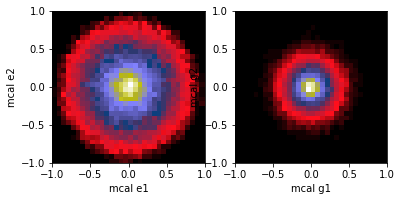

In [54]:
# Let's have a look at a 2D histogram of e1,e2
subplot(121)
hist2d( mcal_e1[mask],  mcal_e2[mask], 32, range=[[-1,1],[-1,1]],cmap='gist_stern');
gca().set_aspect('equal')
xlabel('mcal e1')
ylabel('mcal e2')

subplot(122)
hist2d( catalog['mcal_g1'][mask],  catalog['mcal_g2'][mask], 32, range=[[-1,1],[-1,1]],cmap='gist_stern');
gca().set_aspect('equal')
xlabel('mcal g1')
ylabel('mcal g2')